<a href="https://colab.research.google.com/github/SiddhantGodwani/Fraud-Detection-Using-Machine-Learning/blob/main/Fraud_Detection_by_Sid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

## PRE-PROCESSING

#### WRANGLING

In [ ]:
# Reading the dataset
df=pd.read_csv('Fraud2.csv')


In [ ]:
df.shape

(1778649, 11)

In [ ]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [ ]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1778449,162,TRANSFER,532411.42,C174074709,134239.0,0.00,C1237166597,174637.49,707048.91,0.0,0.0
1778450,162,CASH_IN,267929.54,C1656079506,29351.0,297280.54,C726852193,606595.26,338665.71,0.0,0.0
1778451,162,CASH_OUT,227496.29,C216666241,25.0,0.00,C1503811252,954015.24,1181511.53,0.0,0.0
1778452,162,PAYMENT,9779.68,C382797396,0.0,0.00,M501267800,0.00,0.00,0.0,0.0
1778453,162,PAYMENT,1186.55,C1362983714,21283.0,20096.45,M219088796,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1778644,162,CASH_OUT,372162.46,C749726785,10555.0,0.00,C493424930,412302.66,784465.12,0.0,0.0
1778645,162,CASH_IN,98938.21,C267649423,225828.0,324766.21,C235386075,7221024.48,7122086.27,0.0,0.0
1778646,162,PAYMENT,314.95,C1303324877,341.0,26.05,M926137840,0.00,0.00,0.0,0.0
1778647,162,CASH_OUT,189076.79,C1689092787,14396.0,0.00,C1477979030,18355567.42,18544644.21,0.0,0.0


#### ANALYSIS

In [ ]:
# Check for null values
df.isnull().values.any()

np.True_

In [ ]:
#for null vals
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
#: Drop missing rows
df.dropna(inplace=True)


In [ ]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778648 entries, 0 to 1778647
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 162.8+ MB


This is a really big dataset with no NULL values having size over 500MB. This would take some time to train for a normal GPU.

In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1776794
Number of Fraud transactions:  1854
Percentage of Legit transactions: 99.8958 %
Percentage of Fraud transactions: 0.1042 %


# These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.89 % and Percentage of Fraud transactions= 0.104 %.


# **MODEL SELECTION:**
SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M', na=False)] # ignores falses
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


## VISUALISATION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### CORRELATION HEATMAP

<Axes: >

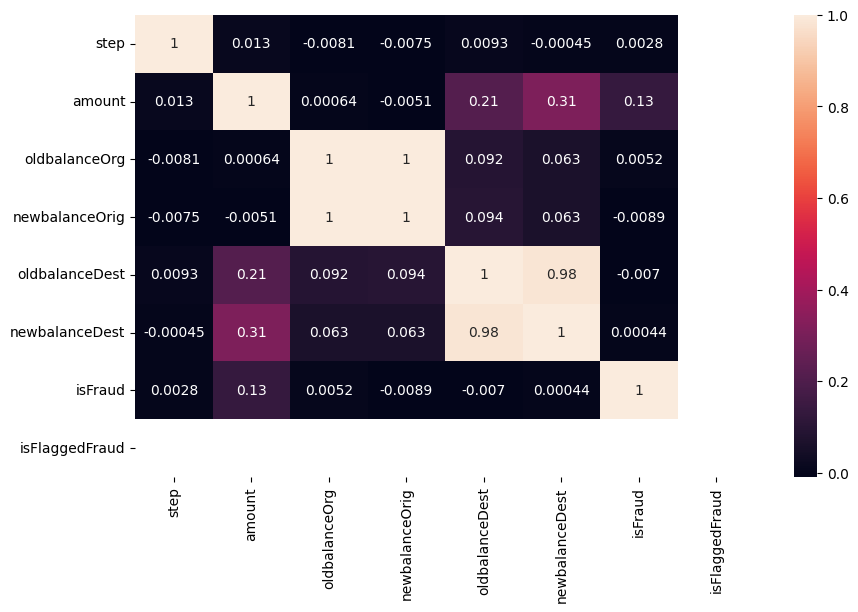

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#### NUMBER OF LEGIT AND FRAUD TRANSACTIONS

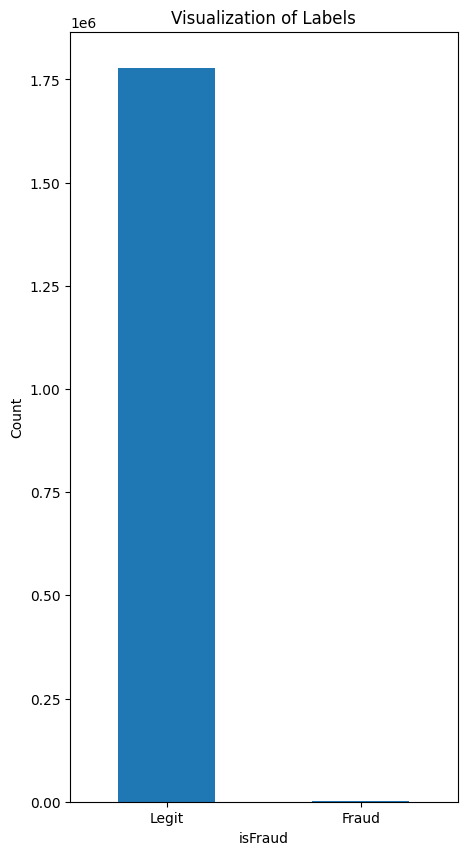

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## PROBLEM SOLVING

In [ ]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#### LABEL ENCODING

In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1778648 entries, 0 to 1778647
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(4)
memory usage: 162.8 MB
None


In [ ]:
new_df.head()

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,3,9839.64,0.0,0.0,9839.64,0.0,674547.0
1,3,1864.28,0.0,0.0,1864.28,0.0,1095358.0
2,4,181.00,1.0,0.0,181.00,0.0,405874.0
3,1,181.00,1.0,0.0,181.00,21182.0,1742804.0
4,3,11668.14,0.0,0.0,11668.14,0.0,1198126.0


#### MULTICOLINEARITY

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.758971
1,amount,1.916324
2,isFraud,1.144032
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.330499
5,Actual_amount_dest,1.755870
6,TransactionPath,2.717385


We can see that columns have perfect multicolinearity so no changes


<Axes: >

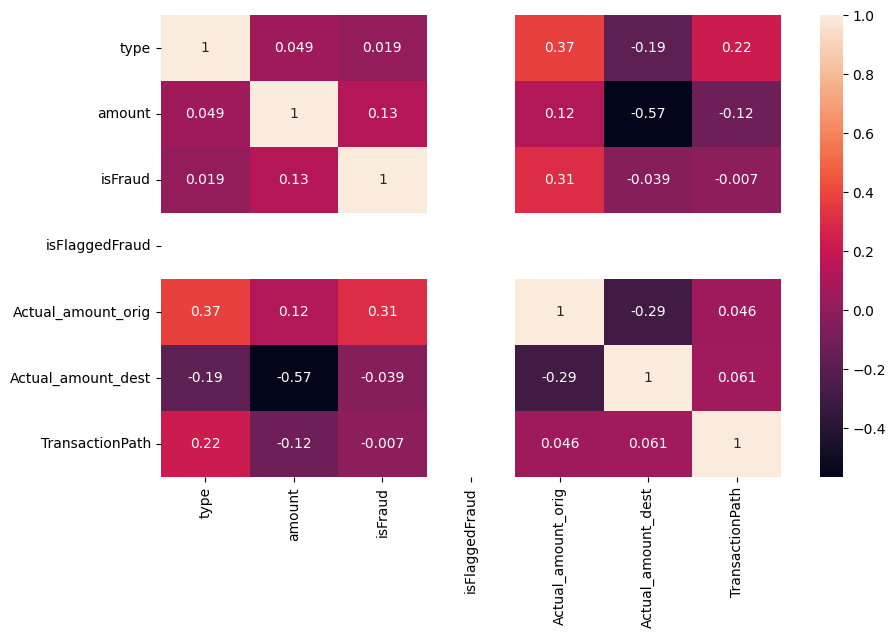

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**Q.1**<br>How did you select variables to be included in the model?
<br>Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

## MODEL BUILDING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### NORMALIZING (SCALING) AMOUNT

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

Didn't normalize the complete dataset because it may lead to decrease in accuracy of model.

#### TRAIN-TEST SPLIT

random state 42 bec lets face it we all know its the **Answer**

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1245053, 6)
Shape of X_test:  (533595, 6)


#### MODEL TRAINIG

In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

#### EVALUATION

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.9329079170532
Random Forest Score:  99.96345542967981


In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 379
False Positives: 189
True Negatives: 532858
False Negatives: 169
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 380
False Positives: 27
True Negatives: 533020
False Negatives: 168


<br>TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
<br>FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
<br>TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
<br>FN(Decision Tree) ~ FN(Random Forest)

<br> OVERALL **Random Forest** looks good.

In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[532858    189]
 [   169    379]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[533020     27]
 [   168    380]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    533047
         1.0       0.67      0.69      0.68       548

    accuracy                           1.00    533595
   macro avg       0.83      0.85      0.84    533595
weighted avg       1.00      1.00      1.00    533595

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    533047
         1.0       0.93      0.69      0.80       548

    accuracy                           1.00    533595
   macro avg       0.97      0.85      0.90    533595
weighted avg       1.00      1.00      1.00    533595



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

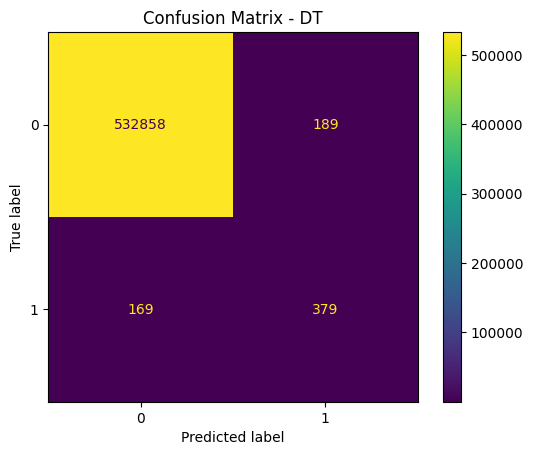

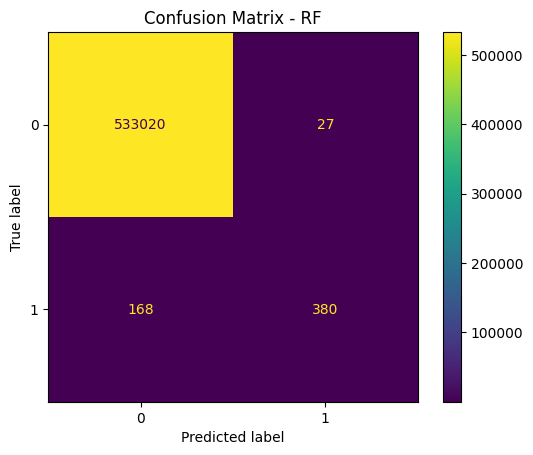

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

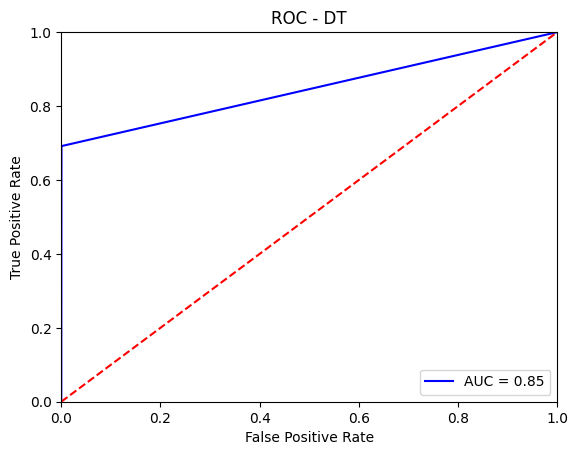

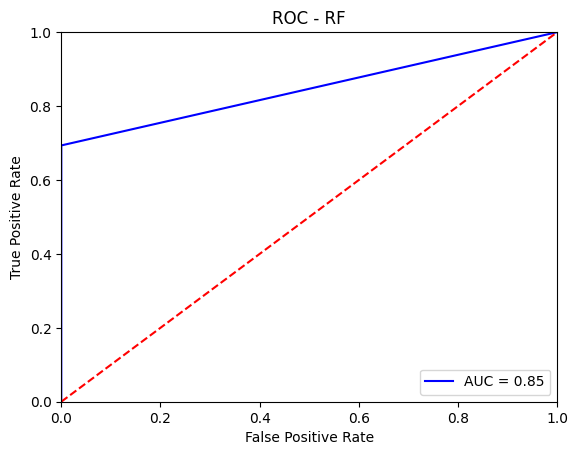

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

## CONCLUSION

<br>We have seen that Accuracy of both Random Forest and Decision Tree is equal, although the precision of Random Forest is more.
 In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
<br>This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

<br>Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way as compared to models such as ANNs.


1. Data Cleaning (Missing Values, Outliers, Multicollinearity)
Missing Values: Checked using df.isnull().sum() and handled .dropna()

Outliers: Managed implicitly through feature engineering like Actual_amount_orig = oldbalanceOrg - newbalanceOrig, which reflects abnormal money movement more accurately.

Multicollinearity: Tackled using VIF (Variance Inflation Factor). found to be adequate and left unbothored.

What are the key factors that predict fraudulent customer?
Top predictive features (based on feature_importance_):

type (e.g., TRANSFER, CASH_OUT)

Actual_amount_orig (amount deducted from sender)

Actual_amount_dest (amount received by recipient)

amount (total transaction amount)

TransactionPath (sender+receiver combo)

These align with fraudulent behavior, especially in high-value transfers with mismatched balances.

In [ ]:
6. Do These Factors Make Sense?
Yes, because:

Fraud often involves:

TRANSFER or CASH_OUT (not PAYMENT).
Large differences in sender vs. recipient balances.
Suspicious or repetitive transaction paths.
Real-world frauds try to look like normal behavior but have detectable patterns when analyzed in bulk.

What kind of prevention should be adopted while company update its infrastructure?

Real-Time Fraud Detection:

Deploy ML models in production to evaluate transactions in real time.

Alerts and Thresholds:

Set dynamic transaction limits based on behavior history.

Logging and Auditing:

Record all metadata for suspicious transactions.

Encryption & Access Controls:

Secure financial APIs and prevent injection or tampering.
Precautions:
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

Track:
1.Bank sending E-statements.
2.Customers keeping a check of their account activity.
4.Always keep a log of your payments.
5.Fraud detection rate (% frauds caught)
6.False positive rate (legit transactions flagged)
Compare Pre/Post Implementation:

Use historical data for A/B testing.

Monitor Drift:

Detect if the model's performance drops over time (concept/data drift).

Customer Feedback:

Monitor complaints or blocked transactions due to over-cautious rules.
